# Algoritma Pembelajaran

Algoritma pembelajaran yang kita kembangkan, meskipun saat Anda masih belajar bagaimana mendekati **Q(s,a)**, Anda perlu mengambil beberapa tindakan dalam **lunar lander**. Bagaimana Anda memilih tindakan tersebut saat Anda masih belajar? Cara yang paling umum untuk melakukannya adalah dengan menggunakan sesuatu yang disebut **Epsilon-greedy policy**. Mari kita lihat bagaimana itu bekerja.

## Algoritma dan Tindakan

Berikut adalah algoritma yang telah Anda lihat sebelumnya. Salah satu langkah dalam algoritma adalah mengambil tindakan dalam **lunar lander**. Ketika algoritma pembelajaran masih berjalan, kita tidak benar-benar tahu apa tindakan terbaik yang harus diambil di setiap keadaan. Jika kita tahu, kita sudah selesai belajar. Namun, meskipun kita masih belajar dan belum memiliki estimasi yang baik tentang **Q(s,a)**, bagaimana kita mengambil tindakan di langkah ini dari algoritma pembelajaran?

### Opsi Tindakan

Ketika Anda berada di suatu keadaan **s**, kita mungkin tidak ingin mengambil tindakan secara acak karena itu sering kali akan menjadi tindakan yang buruk. Salah satu opsi yang alami adalah memilih tindakan **a** yang memaksimalkan **Q(s,a)**. Kita bisa mengatakan, meskipun **Q(s,a)** bukan estimasi yang hebat dari fungsi **Q**, mari kita lakukan yang terbaik dan gunakan tebakan kita saat ini dari **Q(s,a)** untuk memilih tindakan **a** yang memaksimalkannya. Ternyata ini mungkin berjalan dengan baik, tetapi bukan opsi terbaik.

Sebagai gantinya, inilah yang biasanya dilakukan. Pada opsi kedua, yang kita katakan adalah, dengan probabilitas 0.95, pilihlah tindakan yang memaksimalkan **Q(s,a)**. Sebagian besar waktu, kita mencoba memilih tindakan yang baik menggunakan tebakan kita saat ini tentang **Q(s,a)**. Tetapi dalam sebagian kecil waktu, katakanlah lima persen dari waktu, kita akan memilih tindakan **a** secara acak.

### Alasan Pemilihan Acak

Mengapa kita ingin kadang-kadang memilih tindakan secara acak? Berikut alasannya. Misalkan ada alasan aneh bahwa **Q(s,a)** diinisialisasi secara acak sehingga algoritma pembelajaran berpikir bahwa menembakkan **main thruster** tidak pernah menjadi ide yang baik. Mungkin parameter **neural network** diinisialisasi sehingga **Q(s, main)** selalu sangat rendah. Jika demikian, maka **neural network**, karena mencoba memilih tindakan **a** yang memaksimalkan **Q(s,a)**, tidak akan pernah mencoba menembakkan **main thruster**. Karena tidak pernah mencoba menembakkan **main thruster**, ia tidak akan pernah belajar bahwa menembakkan **main thruster** terkadang adalah ide yang baik.

Karena inisialisasi acak, jika **neural network** entah bagaimana awalnya terjebak dalam pikiran bahwa beberapa tindakan adalah ide yang buruk, maka opsi pertama berarti bahwa ia tidak akan pernah mencoba tindakan tersebut dan menemukan bahwa mungkin sebenarnya itu adalah ide yang baik untuk mengambil tindakan tersebut, seperti menembakkan **main thruster** terkadang. Di bawah opsi kedua, pada setiap langkah, kita memiliki kemungkinan kecil untuk mencoba tindakan yang berbeda sehingga **neural network** dapat belajar mengatasi prasangka sendiri tentang apa yang mungkin menjadi ide yang buruk yang ternyata tidak demikian.

### Langkah Eksplorasi

Gagasan untuk memilih tindakan secara acak kadang-kadang disebut sebagai **exploration step**. Karena kita akan mencoba sesuatu yang mungkin bukan ide terbaik, tetapi kita akan mencoba beberapa tindakan dalam beberapa keadaan, mengeksplorasi, dan belajar lebih banyak tentang tindakan dalam keadaan di mana kita mungkin tidak memiliki banyak pengalaman sebelumnya. Mengambil tindakan yang memaksimalkan **Q(s,a)**, terkadang ini disebut sebagai **greedy action** karena kita berusaha memaksimalkan hasil kita dengan memilih ini. Dalam literatur pembelajaran penguatan, kadang-kadang Anda juga akan mendengar ini sebagai **exploitation step**.

Saya tahu bahwa eksploitasi bukanlah hal yang baik, tidak ada yang seharusnya mengeksploitasi orang lain. Namun, secara historis, istilah ini digunakan dalam pembelajaran penguatan untuk mengatakan, mari kita manfaatkan semua yang telah kita pelajari untuk melakukan yang terbaik yang kita bisa. Dalam literatur pembelajaran penguatan, kadang-kadang Anda mendengar orang berbicara tentang **exploration versus exploitation trade-off**, yang merujuk pada seberapa sering Anda mengambil tindakan secara acak atau mengambil tindakan yang mungkin bukan yang terbaik untuk belajar lebih banyak, dibandingkan dengan mencoba memaksimalkan hasil Anda dengan mengambil tindakan yang memaksimalkan **Q(s,a)**.

### Kebijakan Epsilon-greedy

Pendekatan ini, yaitu opsi kedua, memiliki nama, yaitu **Epsilon-greedy policy**, di mana di sini Epsilon adalah 0.05, yaitu probabilitas untuk memilih tindakan secara acak. Ini adalah cara paling umum untuk membuat algoritma pembelajaran penguatan Anda menjelajahi sedikit, bahkan sambil kadang-kadang atau mungkin sebagian besar waktu mengambil tindakan greedy.

Sebagai catatan, banyak orang telah berkomentar bahwa nama **Epsilon-greedy policy** membingungkan karena Anda sebenarnya bersikap greedy 95 persen dari waktu, bukan lima persen dari waktu. Jadi mungkin lebih baik jika kita menyebutnya **1 minus Epsilon-greedy policy**, karena 95 persen greedy dan lima persen eksplorasi, itu sebenarnya adalah deskripsi yang lebih akurat dari algoritma tersebut. Tetapi karena alasan sejarah, nama **Epsilon-greedy policy** adalah yang sudah melekat.

### Strategi Inisialisasi

Terakhir, salah satu trik yang kadang digunakan dalam pembelajaran penguatan adalah memulai dengan Epsilon yang tinggi. Awalnya, Anda banyak mengambil tindakan secara acak dan kemudian secara bertahap menurunkannya, sehingga seiring waktu Anda kurang mungkin mengambil tindakan secara acak dan lebih mungkin menggunakan estimasi **Q-function** Anda yang semakin baik untuk memilih tindakan yang baik. Misalnya, dalam latihan **lunar lander**, Anda mungkin memulai dengan Epsilon yang sangat, sangat tinggi, mungkin bahkan **Epsilon = 1.0**. Anda memilih tindakan sepenuhnya secara acak pada awalnya dan kemudian secara bertahap menurunkannya hingga katakanlah 0.01, sehingga pada akhirnya Anda mengambil tindakan greedy 99 persen dari waktu dan bertindak secara acak hanya satu persen dari waktu.

Jika ini terlihat rumit, jangan khawatir. Kami akan menyediakan kode di Jupiter Lab yang menunjukkan cara melakukannya. Jika Anda mengimplementasikan algoritma seperti yang telah kita gambarkan dengan arsitektur **neural network** yang lebih efisien dan dengan kebijakan eksplorasi **Epsilon-greedy**, Anda akan menemukan bahwa mereka bekerja cukup baik pada **lunar lander**.

## Tantangan dalam Pembelajaran Penguatan

Salah satu hal yang saya perhatikan tentang algoritma pembelajaran penguatan adalah bahwa dibandingkan dengan pembelajaran terawasi, mereka lebih sensitif dalam hal pilihan **hyperparameters**. Misalnya, dalam pembelajaran terawasi, jika Anda mengatur **learning rate** sedikit terlalu kecil, maka mungkin algoritma akan memerlukan waktu lebih lama untuk belajar. Mungkin perlu tiga kali lipat waktu untuk dilatih, yang memang menjengkelkan, tetapi mungkin tidak terlalu buruk. Sedangkan dalam pembelajaran penguatan, saya menemukan bahwa jika Anda mengatur nilai **Epsilon** tidak cukup baik, atau mengatur parameter lain tidak cukup baik, itu tidak hanya memerlukan waktu tiga kali lipat untuk belajar. Mungkin bisa memerlukan waktu sepuluh kali atau seratus kali lipat lebih lama untuk belajar.

Algoritma pembelajaran penguatan, saya rasa karena mereka kurang matang dibandingkan algoritma pembelajaran terawasi, jauh lebih sensitif terhadap pilihan parameter yang kecil seperti itu, dan itu kadang-kadang lebih membuat frustrasi untuk mengatur parameter ini dibandingkan dengan algoritma pembelajaran terawasi. Namun, sekali lagi, jika Anda khawatir tentang lab praktik dan latihan program, kami akan memberi Anda pemahaman tentang parameter baik yang bisa digunakan dalam latihan program sehingga Anda seharusnya bisa melakukannya dan berhasil belajar **lunar lander**, semoga tanpa terlalu banyak masalah.

## Video Tambahan

Dalam video opsional berikutnya, saya ingin kita melakukan beberapa penyempurnaan algoritma, **mini batching**, dan juga menggunakan **soft updates**. Bahkan tanpa penyempurnaan tambahan ini, algoritma akan berjalan dengan baik, tetapi ini adalah penyempurnaan tambahan yang membuat algoritma berjalan jauh lebih cepat. Tidak apa-apa jika Anda melewatkan video ini, kami telah menyediakan segala yang Anda butuhkan di lab praktik untuk berhasil menyelesaikannya. Tetapi jika Anda tertarik untuk mempelajari lebih banyak tentang rincian dua algoritma pembelajaran penguatan yang dinamai, maka ikuti saya dan mari kita lihat di video berikutnya, **mini batching** dan **soft updates**.


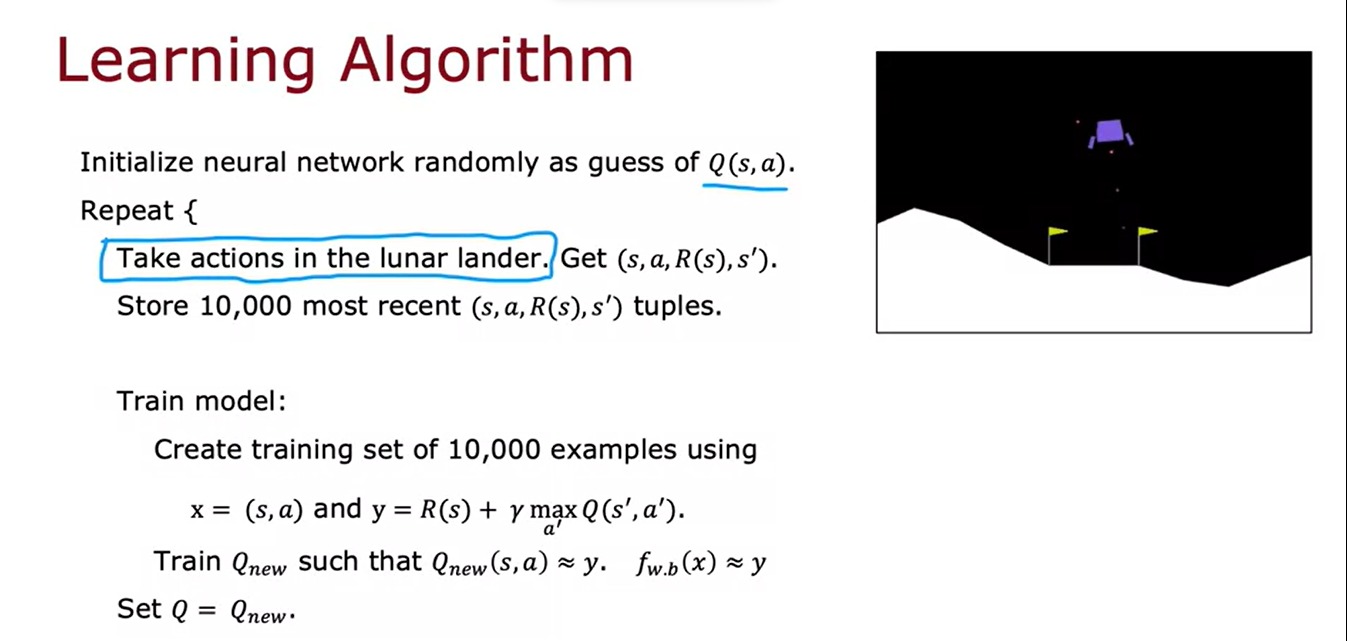
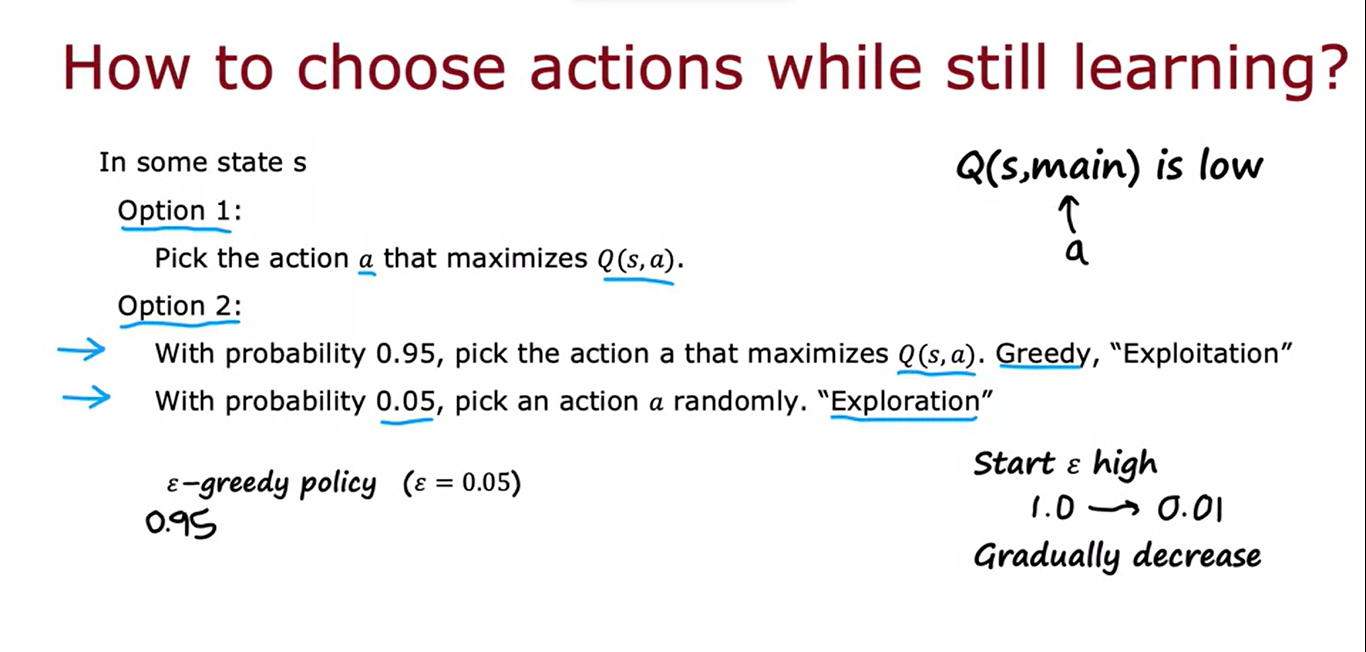